# *SNURF* differentially methylated region

This example demonstrates the paternally imprinted differentially methylated region (DMR) in the [*SNURF* gene](https://www.ncbi.nlm.nih.gov/gene/8926). Usually this DMR is only methylated in the paternal haplotype but not in the maternal haplotype. We use PacBio HiFi long-read sequencing data generated from the HG002 individual from the [Genome in a Bottle](https://www.nist.gov/programs-projects/genome-bottle) cohort. The BAM file used here has been haplotype-tagged using the `HP` tag.


Data sources:
- PacBio HiFi sequencing: [URL](https://downloads.pacbcloud.com/public/dataset/HG002-CpG-methylation-202202/HG002.GRCh38.haplotagged.bam)


In [2]:
import matplotlib.pyplot as plt
import lakeview as lv

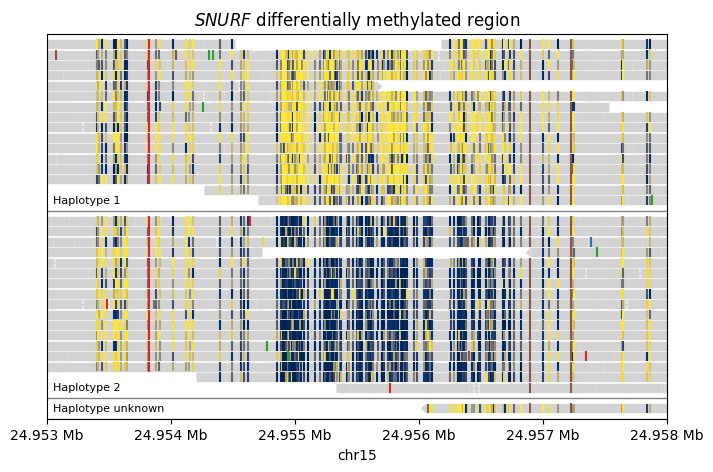

In [3]:
CHROMOSOME = "chr15"
PACBIO_BAM_PATH = "../../tests/data/HG002_GRCh38_SNURF_haplotagged.bam"

painter = lv.SequenceAlignment.from_file(PACBIO_BAM_PATH, CHROMOSOME)
fig, ax = plt.subplots(figsize=(8, 5))
painter.draw_alignment(
    ax,
    group_by=lambda segment: segment.get_tag("HP") if segment.has_tag("HP") else 3,
    group_labels={1: "Haplotype 1", 2: "Haplotype 2", 3: "Haplotype unknown"},
    show_modified_bases=True,
    modified_bases_kw=dict(
        linewidth=1.5,
        colormaps={("C", "m", "+"): "cividis", ("C", "m", "-"): "cividis"},
    ),
)
ax.set_title(r"$\it{SNURF}$ differentially methylated region")
ax.set_xlim(24.953e6, 24.958e6)
ax.set_xlabel("chr15")
ax.xaxis.set_major_formatter(lv.plot.BasePairFormatter("Mb", show_suffix=True))

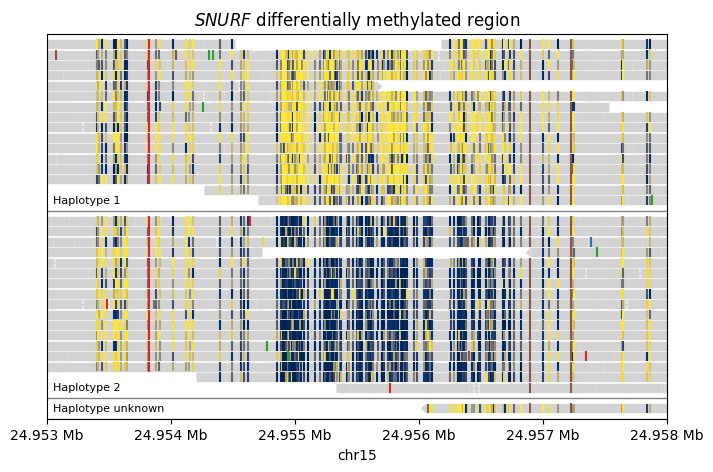

In [4]:
fig